In [1]:
# Import libraries
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Activation,Dropout
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow.python.keras.engine
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_files
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:

train_dir = "D:\Sus manu\DATASET\TRAIN"
test_dir = "D:\Sus manu\DATASET\TEST"

def load_dataset(path):
    data = load_files(path) #load all files from the path
    files = np.array(data['filenames']) #get the file  
    targets = np.array(data['target'])#get the the classification labels as integer index
    target_labels = np.array(data['target_names'])#get the the classification labels 
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)



In [4]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 1)

In [5]:
# print ("x_train shape: " + str(x_train.shape))
# print ("x_train shape: " + str(y_train.shape))
# print ("x_validate shape: " + str(x_validate.shape))
# print ("y_validate shape: " + str(y_validate.shape))
# print ("x_test shape: " + str(x_test.shape))
# print ("y_test shape: " + str(y_test.shape))

In [6]:
# Convert jpg file to numpy array to feed to the CNN.
#By using Opencv .

def convert_image_to_array(files):
    width, height, channels = 100, 100, 3
    images_as_array = np.empty((files.shape[0], width, height, channels), dtype=np.uint8) #define train and test data shape
    for idx,file in enumerate(files):
        img = cv2.imread(file) 
        res = cv2.resize(img, dsize=(width, height), interpolation=cv2.INTER_CUBIC) #As images have different size, resizing all 
        images_as_array[idx] = res                                                  #images to have same shape of image array
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print(x_train.shape)

x_valid = np.array(convert_image_to_array(x_validate))
print(x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print(x_test.shape)

(18051, 100, 100, 3)
(4513, 100, 100, 3)
(2513, 100, 100, 3)


In [7]:
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)
y_validate = y_validate.reshape(y_validate.shape[0],1)
print(x_train)

[[[[0.9372549  0.9372549  0.9372549 ]
   [0.9372549  0.9372549  0.9372549 ]
   [0.9372549  0.9372549  0.9372549 ]
   ...
   [0.9372549  0.9372549  0.9372549 ]
   [0.9372549  0.9372549  0.9372549 ]
   [0.9372549  0.9372549  0.9372549 ]]

  [[0.9372549  0.9372549  0.9372549 ]
   [0.9372549  0.9372549  0.9372549 ]
   [0.9372549  0.9372549  0.9372549 ]
   ...
   [0.9372549  0.9372549  0.9372549 ]
   [0.9372549  0.9372549  0.9372549 ]
   [0.9372549  0.9372549  0.9372549 ]]

  [[0.9372549  0.9372549  0.9372549 ]
   [0.9372549  0.9372549  0.9372549 ]
   [0.9372549  0.9372549  0.9372549 ]
   ...
   [0.9372549  0.9372549  0.9372549 ]
   [0.9372549  0.9372549  0.9372549 ]
   [0.9372549  0.9372549  0.9372549 ]]

  ...

  [[0.92156863 0.92156863 0.92156863]
   [0.92156863 0.92156863 0.92156863]
   [0.92156863 0.92156863 0.92156863]
   ...
   [0.92156863 0.92156863 0.92156863]
   [0.92156863 0.92156863 0.92156863]
   [0.92156863 0.92156863 0.92156863]]

  [[0.92156863 0.92156863 0.92156863]
   [0.9

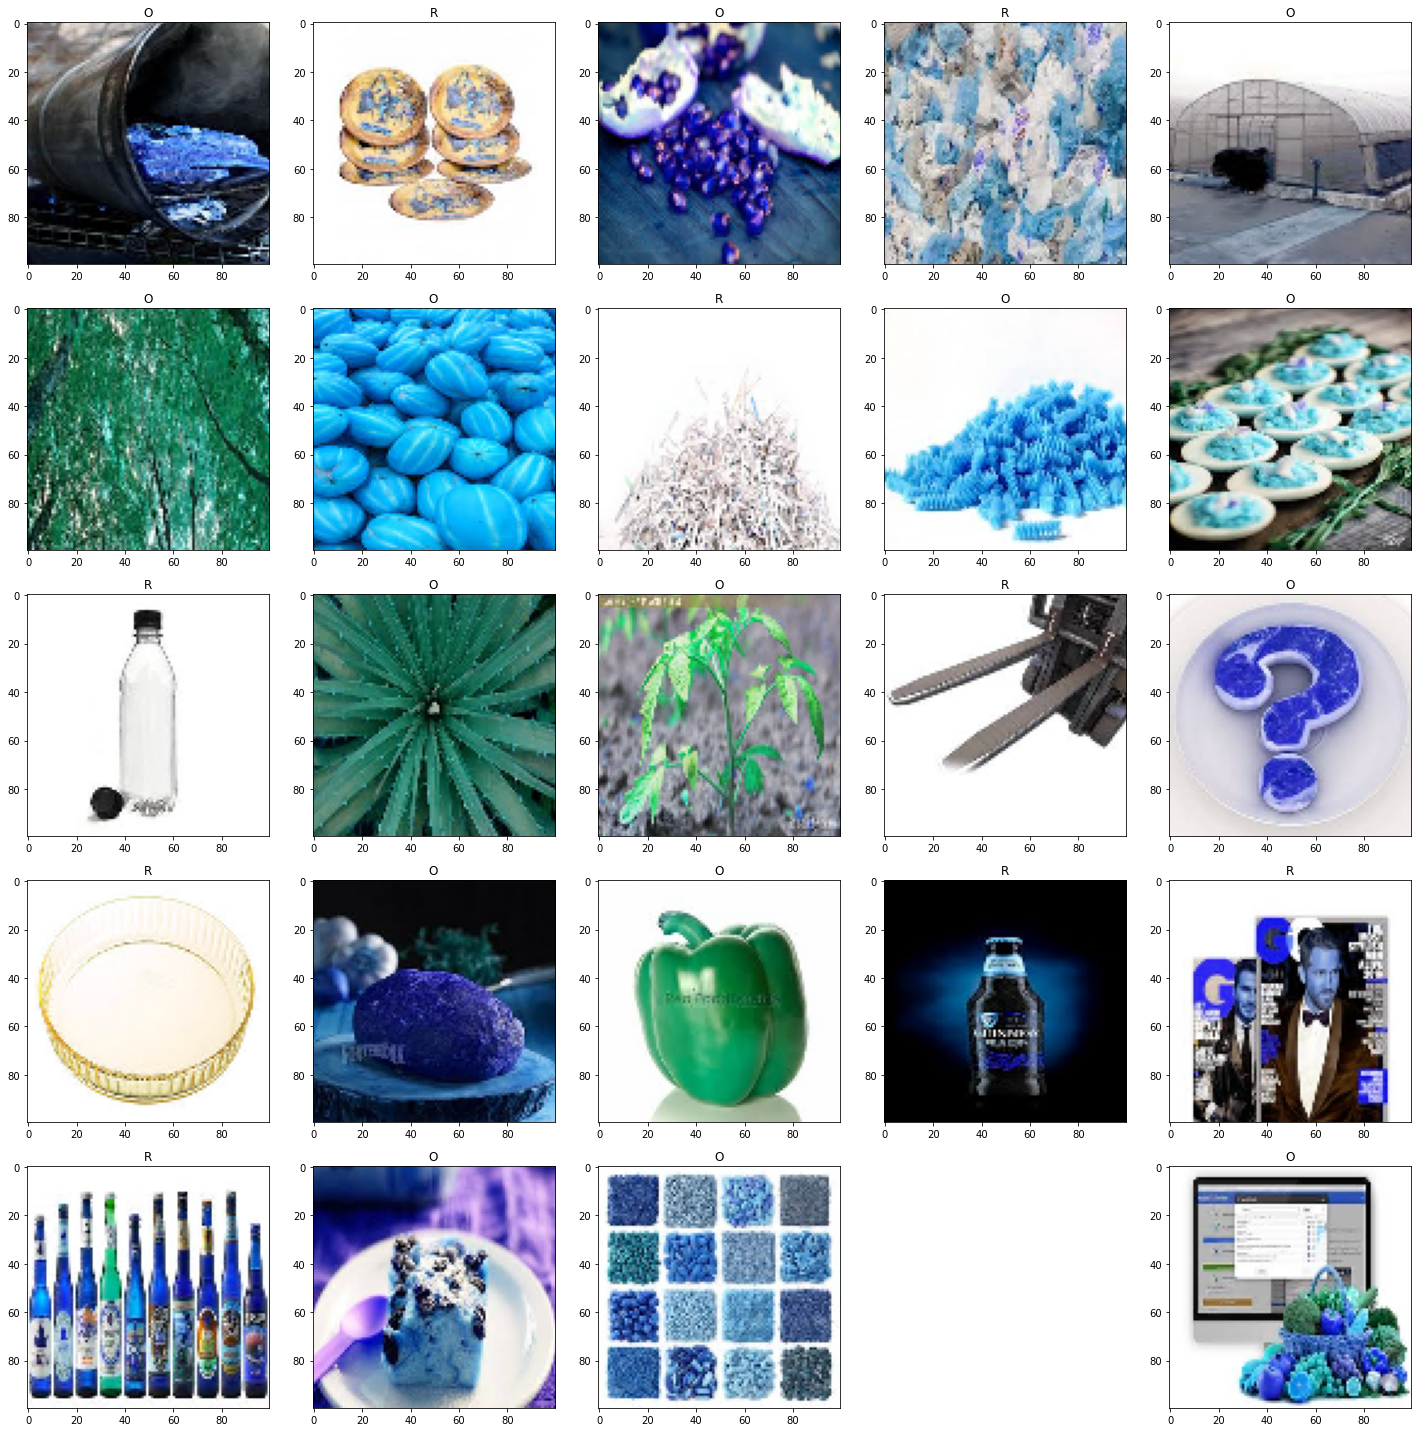

In [8]:
plt.figure(figsize=(20,20))
classes = ['O','R']
for i in range(1,26):
    index = np.random.randint(x_train.shape[0])
    plt.subplot(5, 5, i)
    plt.imshow(np.squeeze(x_train[index]), cmap='cool')
    plt.title(classes[int(y_train[index])])
    plt.tight_layout()
plt.show() 

In [9]:
from glob import glob 

className = glob(train_dir + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [10]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train) 

In [11]:
numberOfClass = 2;

In [12]:
# Convolutional Neural Network - CNN 

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(164))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"]) 
batch_size = 256 

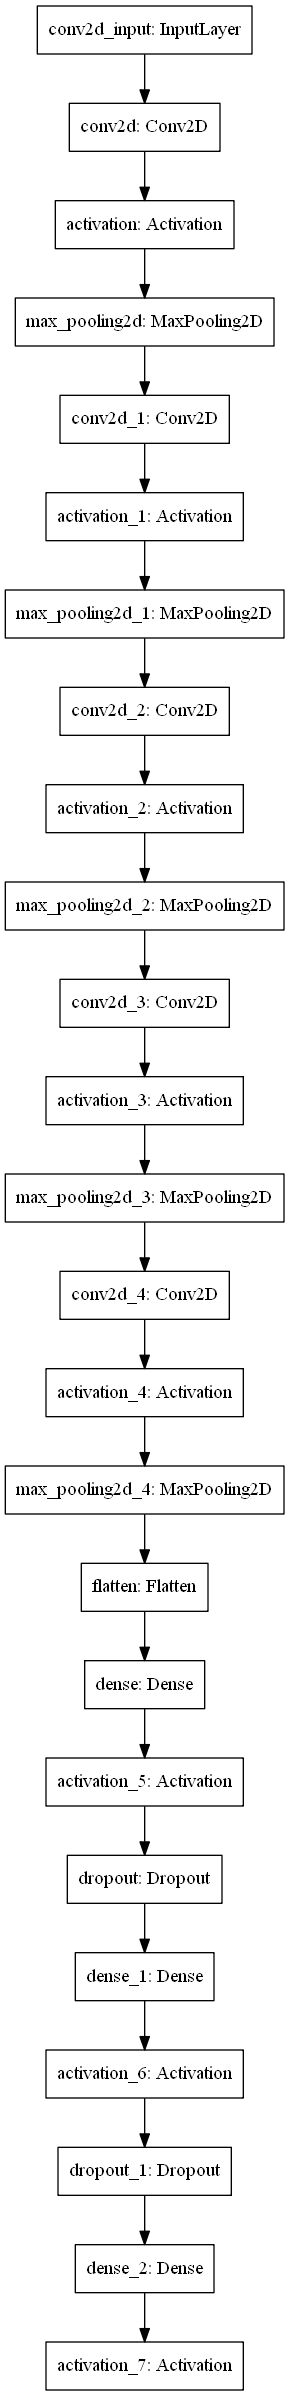

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [14]:
train_datagen = ImageDataGenerator(rescale= 1./255) 
test_datagen = ImageDataGenerator(rescale= 1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=10,
        validation_data = test_generator) 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
24/89 [=======>......................] - ETA: 12:27 - loss: 0.5803 - accuracy: 0.6852

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [ ]:
test_x, test_y = test_generator.__getitem__(1)

labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(15):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])
